In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gradient_descents import classic_grad_descent, stochastic_grad_descent, momentum_grad_descent, rmsprop_grad_descent, adam_grad_descent
from hypotheses import Linear
from cost_functions import MSE
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Read Data

In [34]:
def individual_task(h_type, degree, scaler):
    df = pd.read_csv('data/restaurant_revenue.txt', header=None, sep=',')
    if scaler is not None:
        df = pd.DataFrame(scaler.fit_transform(df.values))
    X = df[[0]].values
    y = df[[1]].values
    return h_type(X, y, degree=degree)


In [35]:
max_num_itter = 1000

## Classic GD

In [36]:
h = individual_task(Linear, 1, None)
loss_history1, weights_history1, y_pred_history1 = classic_grad_descent(h, max_num_itter, MSE, regularization=None, C=1, alpha=0.001, eps=0, mini_batch_size=32)

## SGD

In [37]:
h = individual_task(Linear, 1, None)
loss_history2, weights_history2, y_pred_history2 = stochastic_grad_descent(h, max_num_itter, MSE, regularization=None, C=1, alpha=0.01, eps=0, mini_batch_size=1)

## Momentum

In [38]:
h = individual_task(Linear, 1, None)
loss_history3, weights_history3, y_pred_history3 = momentum_grad_descent(h, max_num_itter, MSE, regularization=None, C=1, alpha=0.001, eps=0, beta=0.9, mini_batch_size=32)

## Rmsprop

In [39]:
h = individual_task(Linear, 1, None)
loss_history4, weights_history4, y_pred_history4 = rmsprop_grad_descent(h, max_num_itter, MSE, regularization=None, C=1, alpha=0.001, eps=0, beta=0.9, epsilon=1e-6, mini_batch_size=32)

In [65]:
y_pred_history2[16]

array([[ 3.9824828 ],
       [ 3.62123866],
       [ 5.47639852],
       [ 4.53644424],
       [ 3.8272297 ],
       [ 5.39222814],
       [ 4.82995511],
       [ 5.51330447],
       [ 4.21576564],
       [ 3.32778982],
       [ 3.73474772],
       [ 8.97806005],
       [ 3.74919997],
       [ 5.40804498],
       [ 3.69132896],
       [ 3.5292529 ],
       [ 4.14083725],
       [ 3.37462006],
       [ 4.18065846],
       [ 4.57837437],
       [ 4.03148398],
       [12.76541707],
       [ 3.59791658],
       [ 4.11646071],
       [ 3.64431263],
       [11.94356184],
       [ 8.14938187],
       [ 6.98886026],
       [ 8.36523517],
       [13.96439531],
       [ 3.45047885],
       [ 4.2797773 ],
       [ 5.92894613],
       [ 3.84707828],
       [ 5.28566608],
       [ 5.11341763],
       [ 5.2142112 ],
       [ 3.66999173],
       [ 8.15434402],
       [ 4.13339403],
       [ 3.54631027],
       [ 4.46157788],
       [ 7.4546816 ],
       [ 3.77382461],
       [ 5.04599449],
       [ 4

## Adam

In [40]:
h = individual_task(Linear, 1, None)
loss_history5, weights_history5, y_pred_history5 = adam_grad_descent(h, max_num_itter, MSE, regularization=None, C=1, alpha=0.001, eps=0, beta1=0.9, beta2=0.999, epsilon=1e-6, mini_batch_size=32)

## Gif Creation

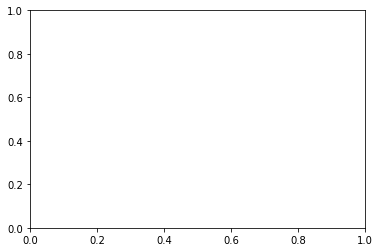

In [60]:
x = h.X_raw[:, 1]
y = list(map(lambda x: x[0], h.y))


for i in range(200):
    plt.plot(x,y,'o')
    

    
    y_pred_history_temp = list(map(lambda x: x[0], y_pred_history4[i]))
    XY = list(zip(x, y_pred_history_temp))
    XY.sort(key=lambda x: x[0])
    plt.plot([i[0] for i in XY], [i[1] for i in XY], c='cyan', label ='Rmsprop')
    
    y_pred_history_temp = list(map(lambda x: x[0], y_pred_history5[i]))
    XY = list(zip(x, y_pred_history_temp))
    XY.sort(key=lambda x: x[0])
    plt.plot([i[0] for i in XY], [i[1] for i in XY], c='magenta', label ='Adam')
    
    plt.ylim([-40,70])
    plt.legend(loc='upper right')

    if i>=0 and i<=9:
        plt.savefig(f'image/00{i}.png')
    elif i>=10 and i<=99:
        plt.savefig(f'image/0{i}.png')
    else:
        plt.savefig(f'image/{i}.png')
    plt.cla()
            
           

In [23]:
!pip install glob3

In [22]:
!pip install moviepy --user

In [21]:
!pip install numpy==1.17.3 --user

  Using cached https://files.pythonhosted.org/packages/e9/dd/a177f27765b1e5f94fa879cbeef61f8807086371d0b6aa232b836d38b78b/numpy-1.17.3-cp37-cp37m-win_amd64.whl


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [35]:
import glob
import moviepy.editor as mpy

In [45]:
gif_name = 'GD'
fps = 6
file_list = glob.glob('image/*')
clip = mpy.ImageSequenceClip(file_list, fps=fps)
clip.write_gif('{}.gif'.format(gif_name), fps=fps)

MoviePy - Building file GD.gif with imageio.
